# Notes

In [31]:


# Feature extractor
def extract_features(image, vector_size=2):
    #image = imread(image_path, mode="RGB")
    try:
        # Using KAZE, cause SIFT, ORB and other was moved to additional module
        # which is adding addtional pain during install
        alg = cv2.KAZE_create()
        # Dinding image keypoints
        kps = alg.detect(image)
        # Getting first 32 of them. 
        # Number of keypoints is varies depend on image size and color pallet
        # Sorting them based on keypoint response value(bigger is better)
        kps = sorted(kps, key=lambda x: -x.response)[:vector_size]
#         print(kps)
        # computing descriptors vector
        kps, dsc = alg.compute(image, kps)
        # Flatten all of them in one big vector - our feature vector
        dsc = dsc.flatten()
#         print(dsc)
        # Making descriptor of same size
        # Descriptor vector size is 64
        #needed_size = (vector_size * 64)
#         print(dsc.size)
#         if dsc.size < needed_size:
#             # if we have less the 32 descriptors then just adding zeros at the
#             # end of our feature vector
#             dsc = np.concatenate([dsc, np.zeros(needed_size - dsc.size)])
    except cv2.error as e:
        print('Error: ', e)
        return None

    return dsc

def batch_extractor(zeros_im, pickled_db_path="features.pck"):
    result = {}
    for i, img in enumerate(zeros_im):
        print('Extracting features from image %s' % i)
        result[i] = extract_features(img)
    return result
    # saving all our feature vectors in pickled file
#     with open(pickled_db_path, 'w') as fp:
#         pickle.dump(result, fp)

In [36]:
def cos_cdist(features1, features2):
    v1 = features1.reshape(1, -1)
    v2 = features2.reshape(1, -1)
    
    dist = scipy.spatial.distance.cdist(v1, v2, 'cosine').reshape(-1) 
#     nearest_ids = np.argsort(dist)[:topn].tolist()
#     nearest_img_paths = self.names[nearest_ids].tolist()
    
    return dist

In [37]:
images = list(zeros_im)+list(ones_im)

result = {}
for i, im in enumerate(images):
    result[i] = extract_features(im)

In [38]:
for i1, im1 in enumerate(images):
    for i2, im2 in enumerate(images):
        if i1 != i2:
            dist = cos_cdist(result[i1], result[i2])
            print(i1, i2, dist)
        

0 1 [0.41942933]
0 2 [0.20848785]
0 3 [0.08819595]
0 4 [0.03995231]
0 5 [0.36377771]
0 6 [0.48264366]
0 7 [0.10168269]
0 8 [0.49627749]
0 9 [0.29483818]
0 10 [0.38266644]
0 11 [0.45930989]
0 12 [0.44181378]
0 13 [0.5339301]
0 14 [0.0632452]
0 15 [0.69089456]
0 16 [0.43827255]
0 17 [0.38009616]
0 18 [0.47081325]
0 19 [0.665733]
1 0 [0.41942933]
1 2 [0.41244371]
1 3 [0.55340434]
1 4 [0.52138085]
1 5 [0.63142636]
1 6 [0.7560375]
1 7 [0.5132286]
1 8 [0.69711158]
1 9 [0.56697297]
1 10 [0.68484575]
1 11 [0.66807]
1 12 [0.6671264]
1 13 [0.65084303]
1 14 [0.48305426]
1 15 [0.79194636]
1 16 [0.7025332]
1 17 [0.68821805]
1 18 [0.7126141]
1 19 [0.72869229]
2 0 [0.20848785]
2 1 [0.41244371]
2 3 [0.36283711]
2 4 [0.30355528]
2 5 [0.30840051]
2 6 [0.65953547]
2 7 [0.22452758]
2 8 [0.64622686]
2 9 [0.4911534]
2 10 [0.60151664]
2 11 [0.54572853]
2 12 [0.60649976]
2 13 [0.68207595]
2 14 [0.31738136]
2 15 [0.70780811]
2 16 [0.62726496]
2 17 [0.60209177]
2 18 [0.61892078]
2 19 [0.76610025]
3 0 [0.0881959

In [6]:
len(extract_features(zeros_im[1]))

128

In [7]:
extract_features(zeros_im[1])

array([-2.17222422e-01, -3.04147929e-01,  2.17222422e-01,  3.04147929e-01,
       -1.98051184e-01, -3.92094433e-01,  1.98057681e-01,  3.92167896e-01,
       -3.22114723e-03, -1.08330296e-02,  3.22497892e-03,  1.11117614e-02,
        3.16647711e-05, -3.85365965e-05,  3.44752552e-05,  4.87778416e-05,
       -3.19391191e-02, -3.62332985e-02,  3.29697207e-02,  3.63488235e-02,
       -1.56398211e-02, -6.52314425e-02,  1.67324260e-01,  2.31447875e-01,
       -3.95445414e-02,  1.18696772e-01,  7.22782388e-02,  1.89576581e-01,
       -1.94185618e-02,  2.90045291e-02,  2.41782926e-02,  3.60299200e-02,
        1.27363170e-03,  7.01205980e-04,  1.41170144e-03,  9.66942636e-04,
        1.16258487e-01, -3.91344391e-02,  1.79312736e-01,  9.85786244e-02,
        3.28546646e-03, -2.05250923e-02,  1.51833281e-01,  2.48809546e-01,
       -5.86095788e-02,  2.05150507e-02,  1.11813754e-01,  9.13263187e-02,
        1.59741303e-05,  2.16729723e-06,  9.07082867e-04,  1.53215346e-03,
        1.78029519e-02, -

In [14]:
class Matcher(object):

    def __init__(self, result):
        self.data = result
        self.names = []
        self.matrix = []
        for k, v in self.data.items():
            self.names.append(k)
            self.matrix.append(v)
        self.matrix = np.array(self.matrix)
        self.names = np.array(self.names)

    def cos_cdist(self, vector):
        # getting cosine distance between search image and images database
        v = vector.reshape(1, -1)
        #print(v)
        return scipy.spatial.distance.cdist(self.matrix, v, 'cosine').reshape(-1)

    def match(self, img, topn=5):
        features = extract_features(img)
        img_distances = self.cos_cdist(features)
        # getting top 5 records
        nearest_ids = np.argsort(img_distances)[:topn].tolist()
        nearest_img_paths = self.names[nearest_ids].tolist()

        return nearest_img_paths, img_distances[nearest_ids].tolist()


Extracting features from image 0
Extracting features from image 1
Extracting features from image 2
Extracting features from image 3
Query image ==========================================


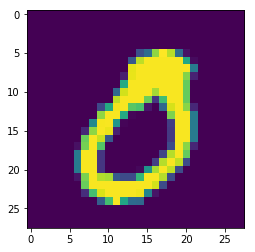

Result images ========================================
Match 0.6173335598102229


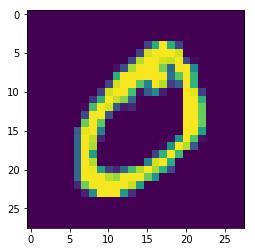

Match 0.5805706687357722


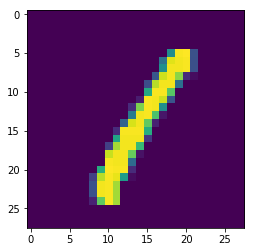

Query image ==========================================


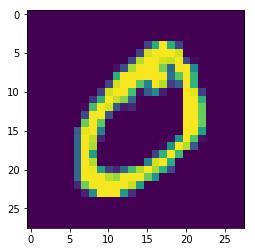

Result images ========================================
Match 0.9999999999999999


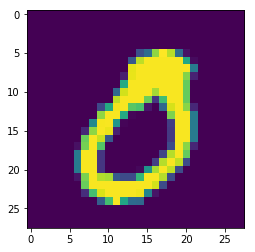

Match 0.33192999931629974


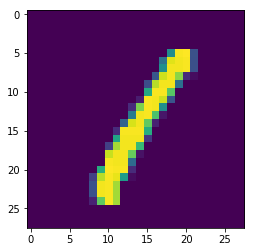

Query image ==========================================


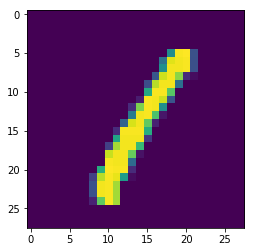

Result images ========================================
Match 1.0


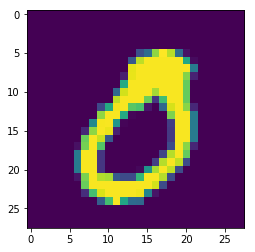

Match 0.6173335598102229


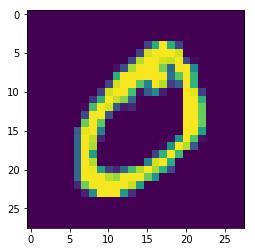

Query image ==========================================


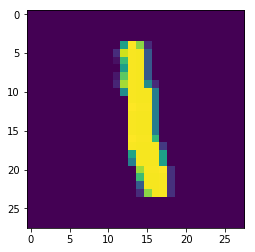

Result images ========================================
Match 1.0


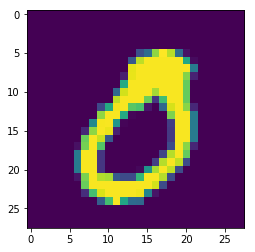

Match 0.5686213127200012


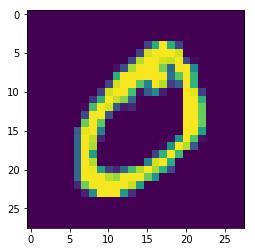

Match 0.5406901126618617


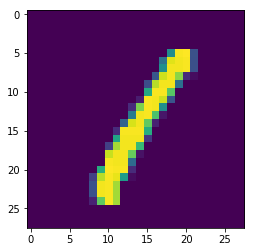

In [17]:
    
def run():
    #images_path = 'resources/images/'
    #files = [os.path.join(images_path, p) for p in sorted(os.listdir(images_path))]
    # getting 3 random images 
    #sample = random.sample(files, 3)
    images = list(zeros_im[:2])+list(ones_im[:2])
    
    result = batch_extractor(images)

    ma = Matcher(result)
    
    
    for idx, im in enumerate(images):
        print('Query image ==========================================')
        plt.imshow(im)
        plt.show()

        names, match = ma.match(im, topn=19)
        print('Result images ========================================')
        for i in range(len(images)-1):
            # we got cosine distance, less cosine distance between vectors
            # more they similar, thus we subtruct it from 1 to get match value
            if i != idx:
                print('Match %s' % (1-match[i]))
                #show_img(os.path.join(images_path, names[i]))
                plt.imshow(images[i])
                plt.show()

run()

In [81]:
ef = extract_features(zeros_im[0])
ef

[<KeyPoint 0x7fc75b703840>, <KeyPoint 0x7fc75b73e180>]
[-3.82156342e-01 -4.04502600e-01  3.82156342e-01  4.04502600e-01
 -1.17090143e-01 -1.49436161e-01  1.17090158e-01  1.49448320e-01
 -4.18876996e-04 -1.21488539e-03  7.47043756e-04  1.24212261e-03
  3.33948843e-02 -3.86159867e-02  3.33949216e-02  3.86162288e-02
 -1.16891041e-01 -1.04465246e-01  1.16945900e-01  1.04483254e-01
 -8.00898820e-02 -9.09448341e-02  2.10019633e-01  2.24935070e-01
 -3.47390585e-02  8.86452571e-02  8.45504776e-02  1.48460805e-01
  5.36675118e-02 -4.91439104e-02  8.00553039e-02  7.54288062e-02
 -1.16040290e-03 -1.05322863e-03  2.13064835e-03  2.06549023e-03
  6.41648695e-02 -4.55393344e-02  9.37741548e-02  8.27484205e-02
 -1.35536492e-02 -6.81546256e-02  1.37472570e-01  1.95315361e-01
 -2.56662983e-02  1.50939159e-03  4.60920073e-02  3.83142903e-02
  1.27404463e-04  1.36510775e-04  7.22568482e-04  7.74214917e-04
  1.16852787e-03 -3.46369739e-03  2.60595791e-03  3.77012882e-03
  4.08092327e-03 -1.61199607e-02  7

array([-3.82156342e-01, -4.04502600e-01,  3.82156342e-01,  4.04502600e-01,
       -1.17090143e-01, -1.49436161e-01,  1.17090158e-01,  1.49448320e-01,
       -4.18876996e-04, -1.21488539e-03,  7.47043756e-04,  1.24212261e-03,
        3.33948843e-02, -3.86159867e-02,  3.33949216e-02,  3.86162288e-02,
       -1.16891041e-01, -1.04465246e-01,  1.16945900e-01,  1.04483254e-01,
       -8.00898820e-02, -9.09448341e-02,  2.10019633e-01,  2.24935070e-01,
       -3.47390585e-02,  8.86452571e-02,  8.45504776e-02,  1.48460805e-01,
        5.36675118e-02, -4.91439104e-02,  8.00553039e-02,  7.54288062e-02,
       -1.16040290e-03, -1.05322863e-03,  2.13064835e-03,  2.06549023e-03,
        6.41648695e-02, -4.55393344e-02,  9.37741548e-02,  8.27484205e-02,
       -1.35536492e-02, -6.81546256e-02,  1.37472570e-01,  1.95315361e-01,
       -2.56662983e-02,  1.50939159e-03,  4.60920073e-02,  3.83142903e-02,
        1.27404463e-04,  1.36510775e-04,  7.22568482e-04,  7.74214917e-04,
        1.16852787e-03, -

In [20]:
len(ef)

2048